In [1]:
from tensorflow.keras.datasets import imdb

In [22]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

In [4]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [7]:
from tensorflow import keras

In [8]:
model = keras.Sequential()

In [10]:
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)

In [ ]:
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
hittory = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


In [14]:
early_stopping_cb.best_epoch

27

In [15]:
import matplotlib.pyplot as plt

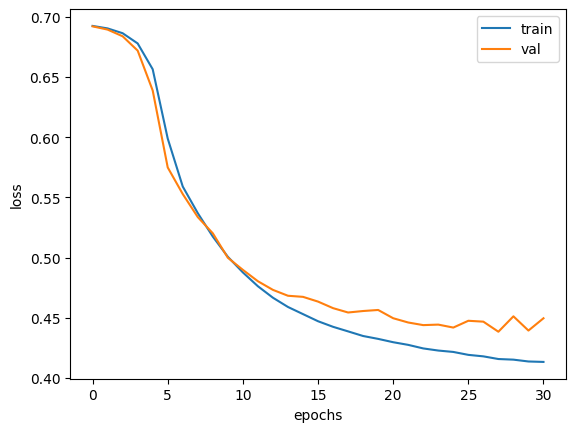

In [16]:
plt.plot(hittory.history['loss'])
plt.plot(hittory.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [12]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


In [14]:
early_stopping_cb.best_epoch

51

In [16]:
import matplotlib.pyplot as plt

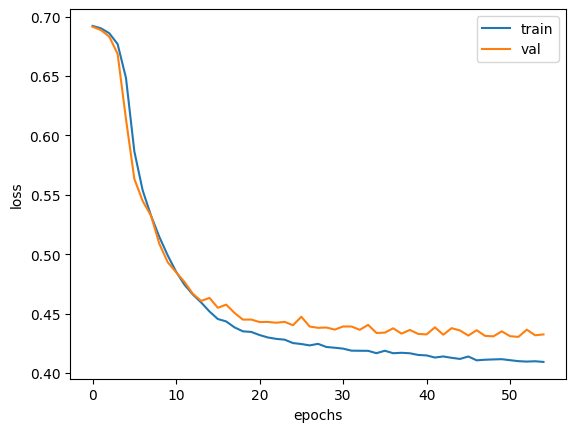

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결
+ 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
+ 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요
+ 즉, 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함

In [29]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True)) # 은닉상태 출력
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))


c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [30]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


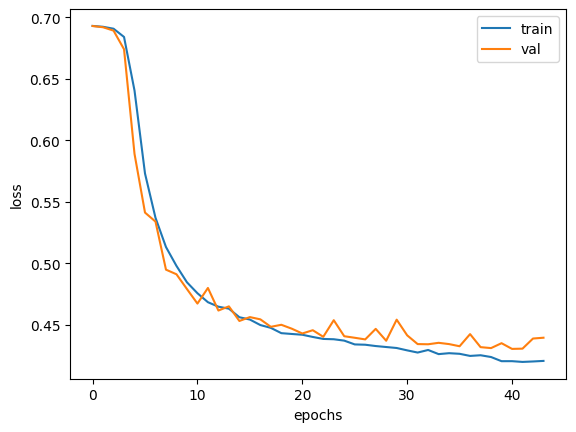

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

## GRU 구조
+  LSTM과 다르게 셀 상태를 계산하지 않고 은닉 상태 하나만 포함

In [33]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

c:\Users\cw3714\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5168 - loss: 0.6928

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5169 - loss: 0.6928 - val_accuracy: 0.5382 - val_loss: 0.6919
Epoch 2/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5530 - loss: 0.6913

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5530 - loss: 0.6913 - val_accuracy: 0.5574 - val_loss: 0.6900
Epoch 3/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5778 - loss: 0.6891

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5778 - loss: 0.6891 - val_accuracy: 0.5780 - val_loss: 0.6872
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5925 - loss: 0.6858

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5925 - loss: 0.6857 - val_accuracy: 0.6026 - val_loss: 0.6827
Epoch 5/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6154 - loss: 0.6802

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6154 - loss: 0.6802 - val_accuracy: 0.6132 - val_loss: 0.6758
Epoch 6/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6202 - loss: 0.6717

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6202 - loss: 0.6717 - val_accuracy: 0.6252 - val_loss: 0.6647
Epoch 7/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6366 - loss: 0.6591

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6367 - loss: 0.6590 - val_accuracy: 0.6462 - val_loss: 0.6470
Epoch 8/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6587 - loss: 0.6380

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6588 - loss: 0.6379 - val_accuracy: 0.6800 - val_loss: 0.6167
Epoch 9/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7032 - loss: 0.5948

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7032 - loss: 0.5946 - val_accuracy: 0.7256 - val_loss: 0.5562
Epoch 10/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7428 - loss: 0.5306

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7428 - loss: 0.5305 - val_accuracy: 0.7452 - val_loss: 0.5196
Epoch 11/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7622 - loss: 0.5019

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7623 - loss: 0.5019 - val_accuracy: 0.7658 - val_loss: 0.5016
Epoch 12/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7765 - loss: 0.4863

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7765 - loss: 0.4863 - val_accuracy: 0.7610 - val_loss: 0.4988
Epoch 13/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7714 - loss: 0.4814

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7715 - loss: 0.4813 - val_accuracy: 0.7744 - val_loss: 0.4820
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7893 - loss: 0.4666

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7893 - loss: 0.4666 - val_accuracy: 0.7774 - val_loss: 0.4790
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7874 - loss: 0.4653

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7874 - loss: 0.4652 - val_accuracy: 0.7796 - val_loss: 0.4766
Epoch 16/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7962 - loss: 0.4559

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7962 - loss: 0.4559 - val_accuracy: 0.7796 - val_loss: 0.4747
Epoch 17/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7959 - loss: 0.4504

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7959 - loss: 0.4504 - val_accuracy: 0.7830 - val_loss: 0.4673
Epoch 18/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8027 - loss: 0.4447

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8027 - loss: 0.4447 - val_accuracy: 0.7762 - val_loss: 0.4689
Epoch 19/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8051 - loss: 0.4408

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8050 - loss: 0.4408 - val_accuracy: 0.7830 - val_loss: 0.4650
Epoch 20/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8041 - loss: 0.4412

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8042 - loss: 0.4411 - val_accuracy: 0.7870 - val_loss: 0.4578
Epoch 21/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8074 - loss: 0.4371

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8074 - loss: 0.4371 - val_accuracy: 0.7746 - val_loss: 0.4739
Epoch 22/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8085 - loss: 0.4333

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8085 - loss: 0.4334 - val_accuracy: 0.7922 - val_loss: 0.4558
Epoch 23/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8094 - loss: 0.4330

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8094 - loss: 0.4330 - val_accuracy: 0.7914 - val_loss: 0.4557
Epoch 24/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8125 - loss: 0.4259

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8125 - loss: 0.4259 - val_accuracy: 0.7864 - val_loss: 0.4600
Epoch 25/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8091 - loss: 0.4300

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8091 - loss: 0.4300 - val_accuracy: 0.7826 - val_loss: 0.4659
Epoch 26/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8088 - loss: 0.4285

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8088 - loss: 0.4285 - val_accuracy: 0.7886 - val_loss: 0.4546
Epoch 27/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8083 - loss: 0.4279

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8083 - loss: 0.4279 - val_accuracy: 0.7728 - val_loss: 0.4771
Epoch 28/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8142 - loss: 0.4221

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8142 - loss: 0.4221 - val_accuracy: 0.7850 - val_loss: 0.4616
Epoch 29/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8132 - loss: 0.4219

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8132 - loss: 0.4219 - val_accuracy: 0.7910 - val_loss: 0.4499
Epoch 30/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8137 - loss: 0.4202

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8137 - loss: 0.4202 - val_accuracy: 0.7850 - val_loss: 0.4560
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8127 - loss: 0.4227

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8127 - loss: 0.4227 - val_accuracy: 0.7860 - val_loss: 0.4560
Epoch 32/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8125 - loss: 0.4220

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8125 - loss: 0.4220 - val_accuracy: 0.7928 - val_loss: 0.4467
Epoch 33/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8138 - loss: 0.4225

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8138 - loss: 0.4225 - val_accuracy: 0.7894 - val_loss: 0.4484
Epoch 34/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8120 - loss: 0.4232

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8120 - loss: 0.4232 - val_accuracy: 0.7930 - val_loss: 0.4452
Epoch 35/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8136 - loss: 0.4179

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8135 - loss: 0.4179 - val_accuracy: 0.7924 - val_loss: 0.4458
Epoch 36/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8130 - loss: 0.4173

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8130 - loss: 0.4173 - val_accuracy: 0.7934 - val_loss: 0.4448
Epoch 37/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8150 - loss: 0.4149

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8150 - loss: 0.4149 - val_accuracy: 0.7910 - val_loss: 0.4456
Epoch 38/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8132 - loss: 0.4189

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8132 - loss: 0.4189 - val_accuracy: 0.7894 - val_loss: 0.4455
Epoch 39/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8166 - loss: 0.4139

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8166 - loss: 0.4139 - val_accuracy: 0.7914 - val_loss: 0.4443
Epoch 40/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8136 - loss: 0.4179

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8136 - loss: 0.4179 - val_accuracy: 0.7904 - val_loss: 0.4452
Epoch 41/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8115 - loss: 0.4191

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8115 - loss: 0.4191 - val_accuracy: 0.7818 - val_loss: 0.4610
Epoch 42/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8143 - loss: 0.4161

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8143 - loss: 0.4161 - val_accuracy: 0.7884 - val_loss: 0.4432
Epoch 43/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8161 - loss: 0.4144

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8160 - loss: 0.4145 - val_accuracy: 0.7914 - val_loss: 0.4494
Epoch 44/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8150 - loss: 0.4154

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8150 - loss: 0.4155 - val_accuracy: 0.7944 - val_loss: 0.4420
Epoch 45/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8135 - loss: 0.4172

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8135 - loss: 0.4172 - val_accuracy: 0.7946 - val_loss: 0.4414
Epoch 46/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8168 - loss: 0.4100

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8168 - loss: 0.4101 - val_accuracy: 0.7918 - val_loss: 0.4428
Epoch 47/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8133 - loss: 0.4183

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8133 - loss: 0.4183 - val_accuracy: 0.7922 - val_loss: 0.4410
Epoch 48/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8168 - loss: 0.4119

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8168 - loss: 0.4119 - val_accuracy: 0.7880 - val_loss: 0.4486
Epoch 49/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8146 - loss: 0.4113

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8146 - loss: 0.4114 - val_accuracy: 0.7954 - val_loss: 0.4391
Epoch 50/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8155 - loss: 0.4128

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8155 - loss: 0.4128 - val_accuracy: 0.7942 - val_loss: 0.4458
Epoch 51/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8192 - loss: 0.4109

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8192 - loss: 0.4109 - val_accuracy: 0.7910 - val_loss: 0.4526
Epoch 52/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8143 - loss: 0.4148

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8143 - loss: 0.4148 - val_accuracy: 0.7910 - val_loss: 0.4417


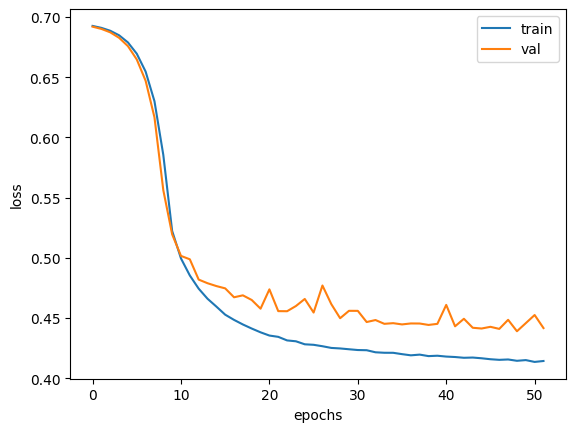

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7992 - loss: 0.4331


[0.43431124091148376, 0.7971199750900269]